In [65]:
#Cliente churn con Regresión Logística

#Una compañía de telecomunicaciones está preocupada por el número de clientes que dejan sus líneas fijas de negocio 
#por las de competidores de cable. Ellos necesitan entender quién se está yendo. 
#Imagina que eres un analista en esta compañía y que tienes que descubrir quién es el cliente que se va y por qué.

#Primero, importemos las librerías necesarias:

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
#%matplotlib inline 
import matplotlib.pyplot as plt

#Cargar los Datos desde el Archivo CSV

churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [66]:
#Selección y pre-procesamiento de datos

#Seleccionemos algunas características para el modelado. También cambiemos el tipo de dato del 
#objetivo (target) 
#para que sea un número entero (integer), ya que es un requerimiento del algoritmo skitlearn:

churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   
                     'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [67]:
churn_df.describe()


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,1.000000


In [50]:
#Definamos X, e y para nuestro set de datos:

X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]


array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [51]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

In [52]:
# También, normalicemos el set de datos:

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

In [53]:
#Entrenar/Probar el set de datos
#Ahora, dividamos nuestro set de datos en dos sets, entrenamiento y prueba:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [54]:
#Modelando (Regresión Logística con Scikit-learn)

#Construyamos nuestro modelo utilizando LogisticRegression con el package Scikit-learn. 
#Esta función implementa regresión logística y puede usar distintos optimizadores numéricos para encontrar parámetros, 
#a saber, ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. 



#La versión de Regresión Logística soporta regularización. Esto es, una técnica que soluciona problemas de 
#sobreajuste en modelos de machine learning. 
#El parámetro C indica fuerza de regularización inversa la cual debe ser un número flotante 
#positivo. 
#Valores más pequeños indican regularización más fuerte. 

#Llenemos nuesto modelo con el subconjunto de entrenamiento:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.01, multi_class='warn', solver='liblinear')

In [55]:
#Ahora, podremos predecir usando nuestro set de prueba:

yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [56]:
#predict_proba devuelve estimaciones para todas las clases. La primer 
#columna es la probabilidad de la clase 1, P(Y=1|X), y 
#la segunda columna es la probabilidad de la clase 0, P(Y=0|X):

yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54, 0.46],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.61, 0.39],
       [0.41, 0.59],
       [0.63, 0.37],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.48, 0.52],
       [0.43, 0.57],
       [0.66, 0.34],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.52, 0.48],
       [0.62, 0.38],
       [0.53, 0.47],
       [0.64, 0.36],
       [0.52, 0.48],
       [0.51, 0.49],
       [0.71, 0.29],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.71, 0.29],
       [0.68, 0.32],
       [0.51, 0.49],
       [0.42, 0.58],
       [0.71, 0.29],
       [0.6 , 0.4 ],
       [0.64, 0.36],
       [0.4 , 0.6 ],
       [0.52, 0.48],
       [0.66, 0.34],
       [0.51, 0.49]])

[[ 6  9]
 [ 1 24]]
Matriz de confusión sin normalización
[[ 6  9]
 [ 1 24]]


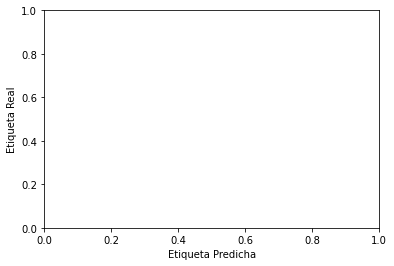

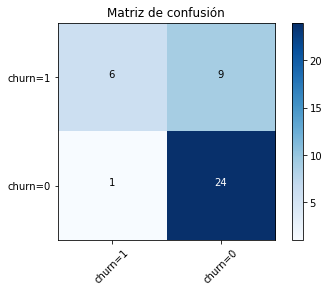

In [64]:
#Evaluación

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  """
  Esta función muestra y dibuja la matriz de confusión.
  La normalización se puede aplicar estableciendo el valor `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Matriz de confusión normalizada")
  else:
    print('Matriz de confusión sin normalización')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


# Calcular la matriz de confusión
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Dibujar la matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False, title='Matriz de confusión')

In [ ]:
#Conclusión:

Observa la primer fila. 
Ahí están los clientes cuyo valor churn en el set de prueba es 1. 
Como se puede observar, de 40 clientes, el valor churn de 15 de ellos es 1. 

Y de otros 15, el clasificador predijo que 6 de ellos son 1 y 9 son 0.
Quiere decir que, para 6 clientes, el valor actual de churn fue 1 en el set de pruebas y el clasificador los predijo 
correctamente como 1. Sin embargo, mientras la etiqueta actual de 9 clientes era 1, el clasificador los predijo como 0, 
lo cual no es muy bueno. Lo podemos considerar como un error del modelo para la primer fila.

¿Qué pasa con los clientes con valor churn 0? 
Miremos la segunda fila. Parece que hay 25 clientes con valor churn 0.
El clasificador predijo correctamente 24 de ellos como 0 y uno de ellos equivocadamente como 1. 
Así que ha hecho un buen trabajo prediciendo los clientes con churn 0. 

Una ventaja de la matriz de confusión es que muestra la habilidad del 
modelo para correctamente predecir o separar las clases. 
En el caso de clasificador binario, como el ejemplo, podemos entender 
a estos números como la cantidad de positivos verdaderos, negativos verdaderos y negativos falsos.   
